### Example code with 100 genes

In [2]:
from openTSNE import TSNE
from examples import utils
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
data = pd.read_csv("data/result_table_100.csv")

In [4]:
data = data[data["UniqueMappedRatio"] > 0.75]
data = data[data["Tissue"] != "--"]


In [20]:
x = data.filter(regex=r'AT*', axis=1).to_numpy()
y = data["Tissue"].to_numpy()

In [21]:
x_train, x_test = train_test_split(x, test_size=.33, random_state=42)

In [22]:
print("Data set contains %d samples with %d features" % x.shape)
print("%d training samples" % x_train.shape[0])
print("%d test samples" % x_test.shape[0])

Data set contains 13888 samples with 100 features
9304 training samples
4584 test samples


In [29]:
tsne30 = TSNE(
    perplexity=30,
    metric="euclidean",
    n_jobs=8,
    random_state=42,
    verbose=True,
)
%time embedding_train30 = tsne30.fit(x)

--------------------------------------------------------------------------------
TSNE(n_jobs=8, random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 3.18 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.29 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.07 seconds
===> Running optimization with exaggeration=12.00, lr=1157.33 for 250 iterations...
Iteration   50, KL divergence 5.0996, 50 iterations in 2.9909 sec
Iteration  100, KL divergence 4.8115, 50 iterations in 3.4670 sec
Iteration  150, KL divergence 4.7530, 50 iterations in 3.1306 sec
Iteration  200, KL divergence 4.7318, 50 iterations in 2.9801 sec
Iteration  250, KL divergence 4.7180, 50 iterations in 2.9678 sec
   --> Time elapsed: 15.54 seconds
===> Running optimization with exaggeration=1.00, lr=1157.33 for 50

In [27]:
tissues = data["Tissue"].value_counts()
print(tissues[tissues > 500])
data[~data["Tissue"].isin(["leaves","seedlings","root","rosette leaf", "shoot", "whole plant"])] = "other"


seedlings       3990
leaves          3474
root            1287
rosette leaf    1074
shoot            538
whole plant      518
Name: Tissue, dtype: int64


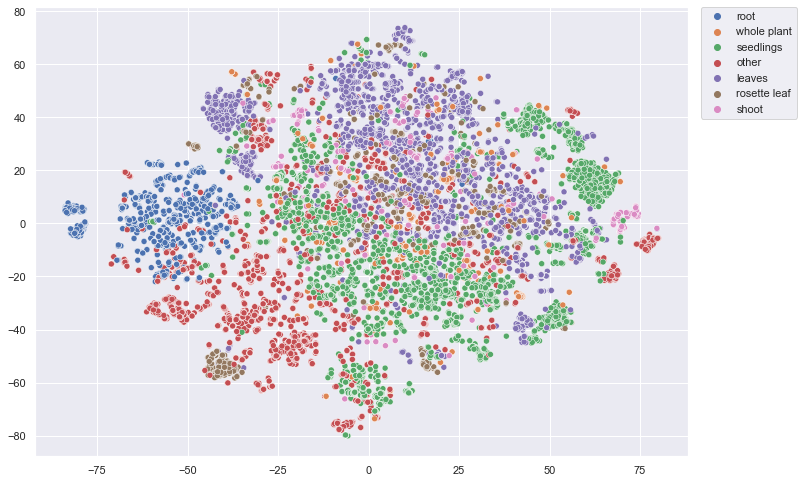

In [33]:
plot2 = sns.scatterplot(x = embedding_train[:,0], y = embedding_train[:, 1], hue = y)
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [34]:
plot2.figure.savefig("100genes30per.png")

--------------------------------------------------------------------------------
TSNE(n_jobs=8, perplexity=300, random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 900 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 9.37 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 2.60 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.08 seconds
===> Running optimization with exaggeration=12.00, lr=1157.33 for 250 iterations...
Iteration   50, KL divergence 3.3776, 50 iterations in 5.0092 sec
Iteration  100, KL divergence 3.3454, 50 iterations in 5.2382 sec
Iteration  150, KL divergence 3.3454, 50 iterations in 5.0696 sec
Iteration  200, KL divergence 3.3453, 50 iterations in 5.1412 sec
Iteration  250, KL divergence 3.3453, 50 iterations in 5.2376 sec
   --> Time elapsed: 25.70 seconds
===> Running optimization with exaggeration=1.00, 

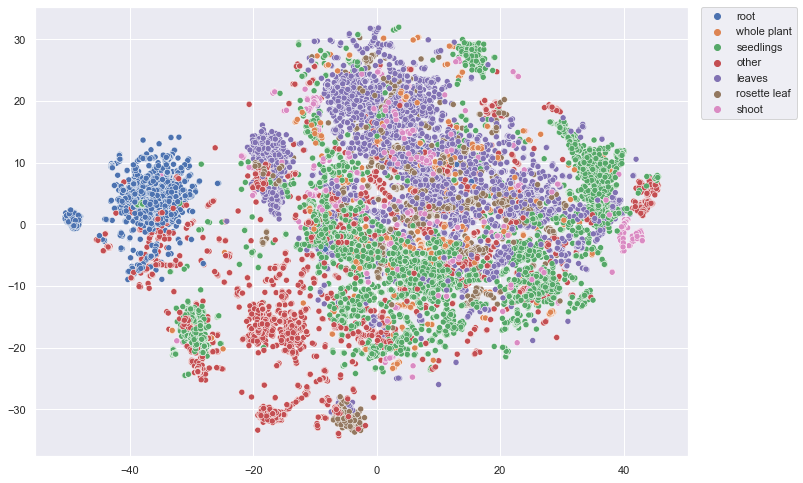

In [31]:
tsne300 = TSNE(
    perplexity=300,
    metric="euclidean",
    n_jobs=8,
    random_state=42,
    verbose=True,
)
%time embedding_train300 = tsne300.fit(x)
sns.scatterplot(x = embedding_train300[:,0], y = embedding_train300[:, 1], hue = y)
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

--------------------------------------------------------------------------------
TSNE(n_jobs=8, perplexity=10, random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 30 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 3.05 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.09 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.08 seconds
===> Running optimization with exaggeration=12.00, lr=1157.33 for 250 iterations...
Iteration   50, KL divergence 6.0489, 50 iterations in 3.2275 sec
Iteration  100, KL divergence 5.4254, 50 iterations in 3.3391 sec
Iteration  150, KL divergence 5.2193, 50 iterations in 3.3994 sec
Iteration  200, KL divergence 5.1025, 50 iterations in 3.3740 sec
Iteration  250, KL divergence 5.0297, 50 iterations in 3.2201 sec
   --> Time elapsed: 16.56 seconds
===> Running optimization with exaggeration=1.00, lr

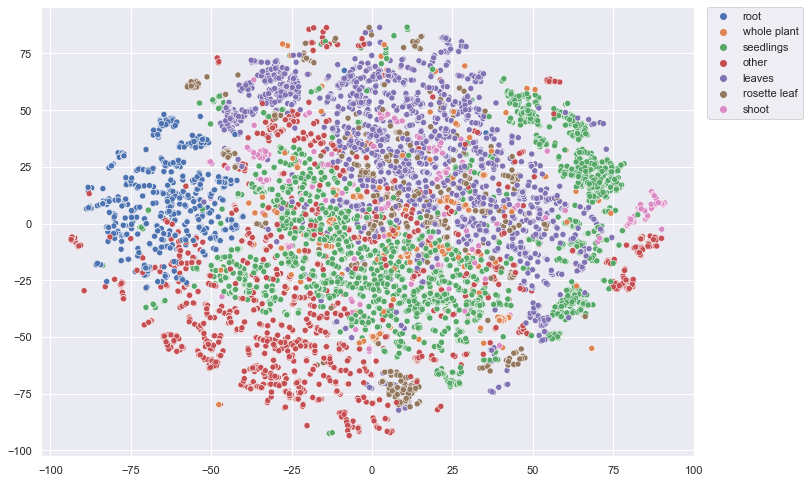

In [32]:
tsne10 = TSNE(
    perplexity=10,
    metric="euclidean",
    n_jobs=8,
    random_state=42,
    verbose=True,
)
%time embedding_train10 = tsne10.fit(x)
sns.scatterplot(x = embedding_train10[:,0], y = embedding_train10[:, 1], hue = y)
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)